# Klasy niezbalansowane

# Zadanie 1

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import Ridge

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

from imblearn.metrics import geometric_mean_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import time
warnings.filterwarnings("ignore")
np.random.seed(42)

In [2]:
df = pd.read_csv("148148-imbalanced.txt", sep='\t')
df.head()

dissim      el0      el1      el2      el3      el4      el5      el6  \
0  0.008145  0.37060  0.24630  0.22314  0.14702  0.18287  0.15211  0.13339   
1  0.011185  0.31693  0.36635  0.39379  0.24677  0.16604  0.22571  0.19066   
2  0.009590  0.40725  0.30701  0.55229  0.25276  0.13042  0.13143  0.11001   
3  0.011693  0.29286  0.36951  0.37223  0.31275  0.23408  0.17033  0.18155   
4  0.012046  0.31146  0.38194  0.34755  0.27464  0.28754  0.21205  0.15479   

        el7       el8  ...   stat68   stat69   stat70   stat71    stat72  \
0  0.116020  0.072099  ...  0.40603  0.49929  0.39410  0.45437  0.154240   
1  0.089436  0.147870  ...  0.23222  0.30088  0.16963  0.28342  0.057524   
2  0.091207  0.116390  ...  0.26279  0.37066  0.26316  0.46910  0.057494   
3  0.148680  0.227610  ...  0.19033  0.23175  0.18690  0.24086  0.017586   
4  0.130720  0.195980  ...  0.22320  0.14191  0.16513  0.21143  0.028777   

     stat73    stat74    stat75  stat76  class  
0  0.235140  0.152440  0.209610  1.4959      1  
1  0.052636  0.003977  0.071883  1.8132      1  
2  0.101930  0.069314  0.240140  1.5576      1  
3  0.015635  0.004952  0.037322  1.8742      1  
4  0.011999 -0.008555  0.029542  2.0076      1  

[5 rows x 126 columns]

In [3]:
df.describe()

dissim           el0           el1           el2           el3  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.006161      0.128689      0.128362      0.135154      0.131595   
std        0.002316      0.090824      0.075364      0.077834      0.063508   
min        0.002397      0.004790      0.003445      0.003386      0.003807   
25%        0.004497      0.078192      0.083366      0.088246      0.093368   
50%        0.005462      0.100975      0.107855      0.113820      0.117310   
75%        0.007359      0.141540      0.147875      0.155270      0.153137   
max        0.020791      0.842630      0.785290      0.860940      0.730770   

                el4           el5           el6           el7           el8  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.134775      0.108093      0.117051      0.109558      0.102331   
std        0.064790      0.066663      0.076008      0.066875      0.066612   
min        0.001842      0.000756      0.000809      0.001468      0.002569   
25%        0.095349      0.065520      0.067155      0.067715      0.060209   
50%        0.122925      0.092089      0.099697      0.095138      0.087669   
75%        0.158183      0.130763      0.144390      0.132310      0.124567   
max        0.724790      0.745380      0.833630      0.797620      0.741210   

       ...        stat68        stat69        stat70        stat71  \
count  ...  10000.000000  10000.000000  10000.000000  10000.000000   
mean   ...      0.278724      0.277469      0.277799      0.285517   
std    ...      0.186587      0.185498      0.187216      0.187940   
min    ...     -0.165970     -0.164730     -0.167340     -0.163350   
25%    ...      0.175890      0.174930      0.173588      0.180650   
50%    ...      0.299630      0.296940      0.298985      0.301325   
75%    ...      0.394040      0.390508      0.392742      0.396125   
max    ...      0.973210      0.968280      0.969990      1.197400   

             stat72        stat73        stat74        stat75        stat76  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.064991      0.064208      0.064569      0.071717      1.584640   
std        0.105362      0.105703      0.106230      0.119852      0.326890   
min       -0.056275     -0.057903     -0.057202     -0.054650      0.359690   
25%       -0.006084     -0.005594     -0.006462     -0.002437      1.368850   
50%        0.043308      0.041518      0.042456      0.044756      1.626700   
75%        0.101450      0.099694      0.100300      0.105152      1.848225   
max        0.777070      0.767810      0.774680      1.524500      2.234800   

              class  
count  10000.000000  
mean       0.969900  
std        0.170871  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 126 columns]

In [4]:
df['class'].value_counts()

class
1    9699
0     301
Name: count, dtype: int64

In [5]:
df.isna().sum().sum()

0

In [6]:
df.dtypes.value_counts()

float64    125
int64        1
Name: count, dtype: int64

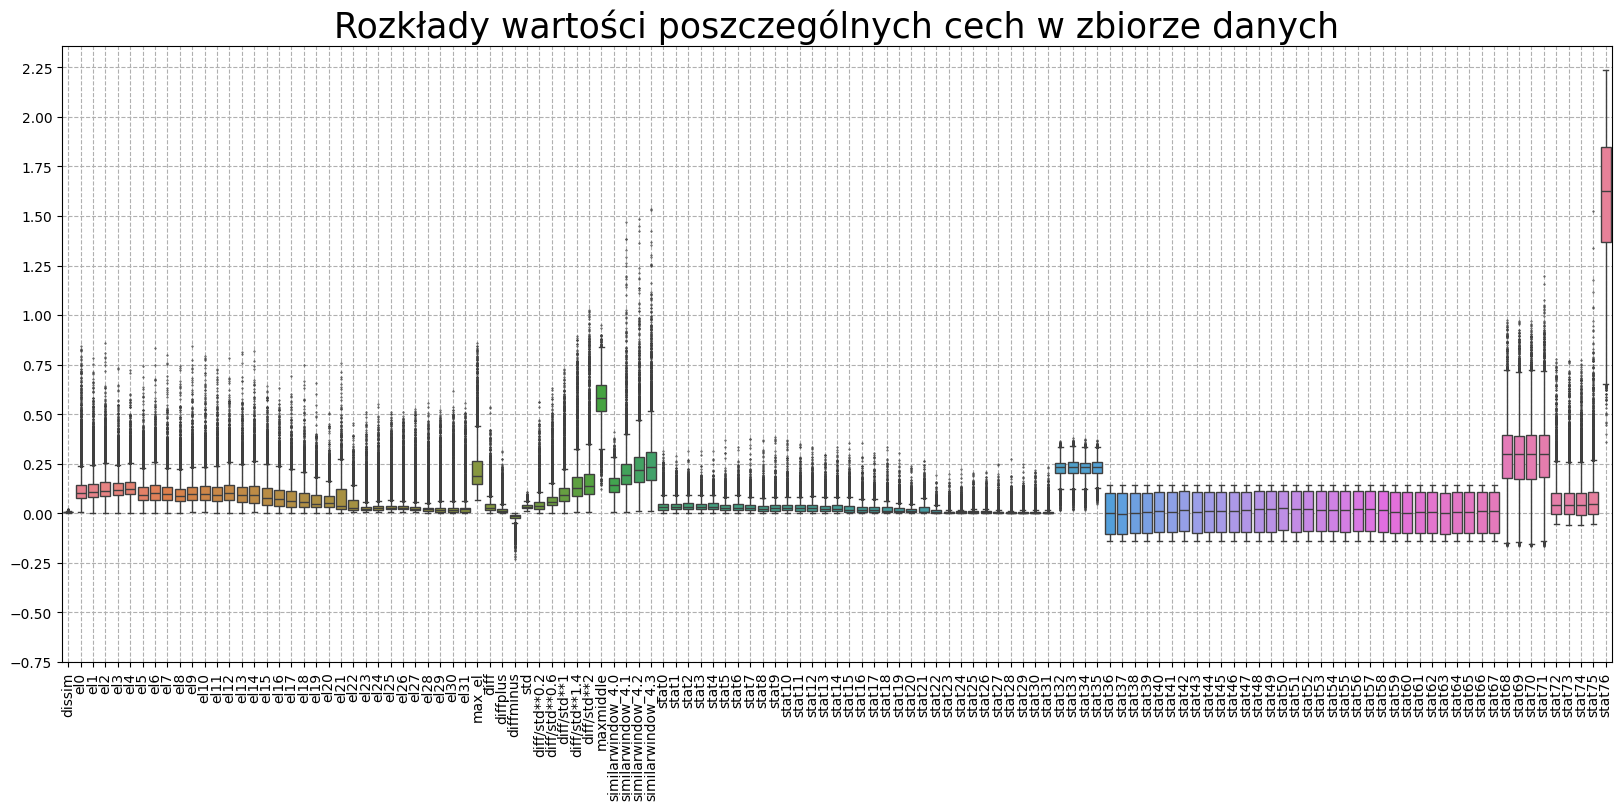

In [7]:
df_plot = df.drop(columns=['class'])
plt.figure(figsize=(20, 8))

p = sns.boxplot(data=df_plot, fliersize=0.5)
_ = p.set(yticks=np.arange(-0.75, 2.5, 0.25))

plt.xticks(rotation=90)
plt.title("Rozkłady wartości poszczególnych cech w zbiorze danych", fontsize=25)
plt.grid(linestyle='--')
plt.savefig("rozklad.png")
plt.show();

In [8]:
X = df.drop(columns=['class'])
y = df['class']

# Zadanie 2

In [9]:
from sklearn.decomposition import PCA

[0.33724943 0.0802635 ]


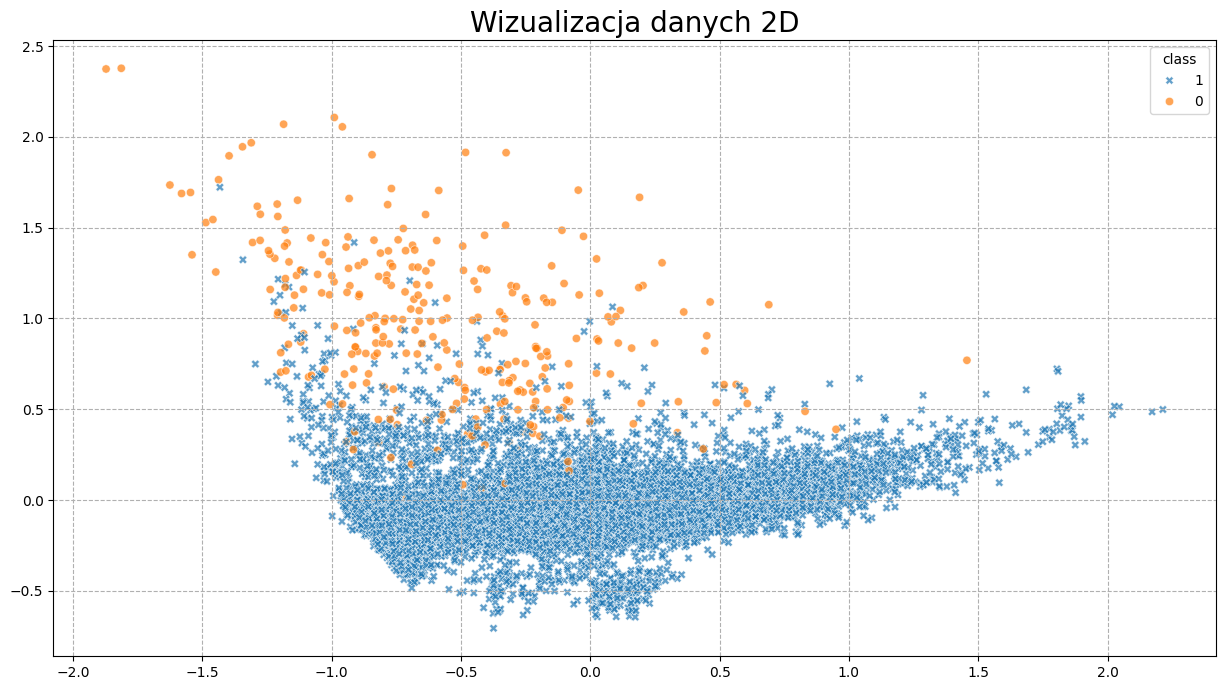

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
X_pca = pd.DataFrame(X_pca, columns=['x', 'y'])
X_pca['class'] = y

plt.figure(figsize=(15, 8))
sns.scatterplot(pd.DataFrame(X_pca), x='x', y='y', hue='class', style='class', alpha=0.7, hue_order=[1, 0])
plt.title("Wizualizacja danych 2D", fontsize=20)
plt.xlabel("")
plt.ylabel("")
# plt.rc('axes', axisbelow=True)
plt.grid(linestyle='--')
plt.savefig("visualization_2d.png")
plt.show();

In [11]:
import plotly.express as px

[0.33724943 0.0802635  0.05974744]


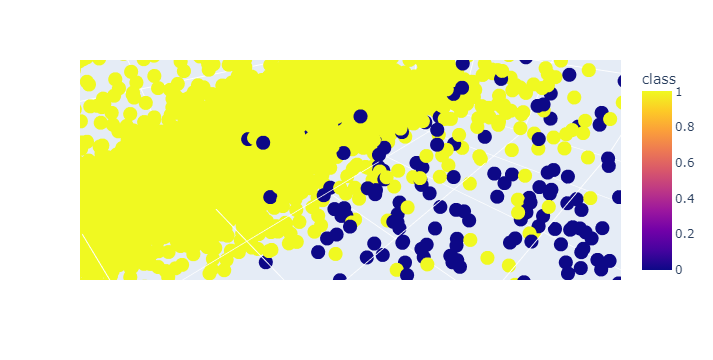

In [12]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
X_pca = pd.DataFrame(X_pca, columns=['x', 'y', 'z'])
X_pca['class'] = y


fig = px.scatter_3d(X_pca, x='x', y='y', z='z', color='class')
fig.show()

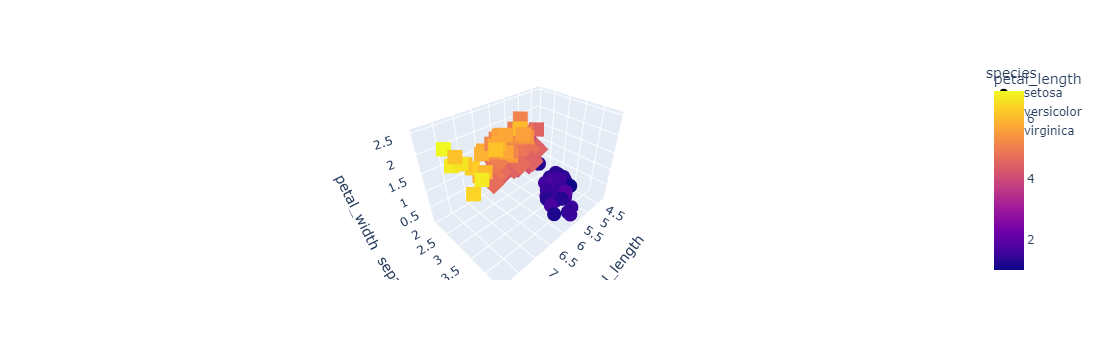

In [13]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
                    color='petal_length', symbol='species')
fig.show()

# Zadanie 4

# Bare data

In [32]:
start = time.time()
models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(class_weight='balanced'),
    RandomForestClassifier(class_weight='balanced'),
    SVC(class_weight='balanced'),
    MLPClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]
fold_10 = StratifiedKFold(n_splits=10, shuffle=True)
metrics = []

for model in models:
    for i, (train_index, test_index) in enumerate(fold_10.split(X, y)):
        X_train, y_train, X_test, y_test = X.loc[train_index], y.loc[train_index], X.loc[test_index], y.loc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)
        roc = roc_auc_score(y_test, y_pred)
        metrics.append({'model': str(type(model)), 'accuracy': accuracy, 'g_mean': g_mean, 'roc': roc})

end = time.time()
print(f"Time: {end - start} seconds") 

df_result_bare = pd.DataFrame(metrics)

Time: 260.2191364765167 seconds


In [33]:
df_group = df_result_bare.groupby('model').mean()
df_group

accuracy    g_mean  \
model                                                                    
<class 'sklearn.discriminant_analysis.Quadratic...    0.9895  0.922680   
<class 'sklearn.ensemble._forest.RandomForestCl...    0.9887  0.864215   
<class 'sklearn.naive_bayes.GaussianNB'>              0.9347  0.927265   
<class 'sklearn.neighbors._classification.KNeig...    0.9902  0.870367   
<class 'sklearn.neural_network._multilayer_perc...    0.9916  0.914459   
<class 'sklearn.svm._classes.SVC'>                    0.9834  0.966991   
<class 'sklearn.tree._classes.DecisionTreeClass...    0.9847  0.854215   

                                                         roc  
model                                                         
<class 'sklearn.discriminant_analysis.Quadratic...  0.925460  
<class 'sklearn.ensemble._forest.RandomForestCl...  0.873686  
<class 'sklearn.naive_bayes.GaussianNB'>            0.927627  
<class 'sklearn.neighbors._classification.KNeig...  0.879090  
<class 'sklearn.neural_network._multilayer_perc...  0.918252  
<class 'sklearn.svm._classes.SVC'>                  0.967485  
<class 'sklearn.tree._classes.DecisionTreeClass...  0.864787

In [34]:
df_melted = pd.melt(df_result_bare, id_vars=['model'], var_name='metryka', value_name='metric_value')
df_melted['model'] = df_melted['model'].str.split('.').str[-1].str.split("'").str[0]
df_melted.head(8)

model   metryka  metric_value
0  KNeighborsClassifier  accuracy         0.993
1  KNeighborsClassifier  accuracy         0.986
2  KNeighborsClassifier  accuracy         0.989
3  KNeighborsClassifier  accuracy         0.990
4  KNeighborsClassifier  accuracy         0.989
5  KNeighborsClassifier  accuracy         0.991
6  KNeighborsClassifier  accuracy         0.993
7  KNeighborsClassifier  accuracy         0.989

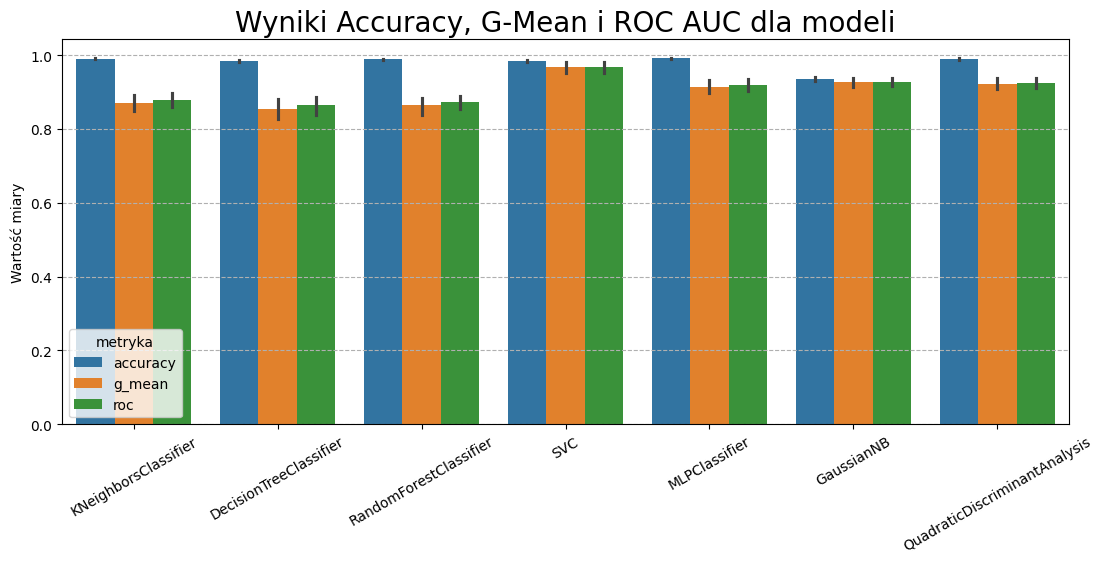

In [35]:
plt.figure(figsize=(13, 5))
ax = sns.barplot(data=df_melted, x='model', y='metric_value', hue='metryka')
plt.xticks(rotation=30)
plt.title("Wyniki Accuracy, G-Mean i ROC AUC dla modeli", fontsize=20)
plt.xlabel("")
plt.ylabel("Wartość miary")
plt.grid(linestyle='--', axis='y')
plt.savefig("metrics_bare.png")
plt.show();

## SMOTE

In [18]:
models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(class_weight='balanced'),
    RandomForestClassifier(class_weight='balanced'),
    SVC(class_weight='balanced'),
    MLPClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]
fold_10 = StratifiedKFold(n_splits=10, shuffle=True)
metrics = []
sm = SMOTE()

X_res, y_res = sm.fit_resample(X, y)

for model in models:
    for i, (train_index, test_index) in enumerate(fold_10.split(X_res, y_res)):
        X_train, y_train, X_test, y_test = X_res.loc[train_index], y_res.loc[train_index], X_res.loc[test_index], y_res.loc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)
        roc = roc_auc_score(y_test, y_pred)
        metrics.append({'model': str(type(model)), 'accuracy': accuracy, 'g_mean': g_mean, 'roc': roc})

df_result = pd.DataFrame(metrics)
df_result

model  accuracy    g_mean  \
0   <class 'sklearn.neighbors._classification.KNei...  0.986082  0.985984   
1   <class 'sklearn.neighbors._classification.KNei...  0.985567  0.985461   
2   <class 'sklearn.neighbors._classification.KNei...  0.991237  0.991198   
3   <class 'sklearn.neighbors._classification.KNei...  0.981959  0.981793   
4   <class 'sklearn.neighbors._classification.KNei...  0.983505  0.983367   
..                                                ...       ...       ...   
65  <class 'sklearn.discriminant_analysis.Quadrati...  0.997938  0.997938   
66  <class 'sklearn.discriminant_analysis.Quadrati...  0.993814  0.993812   
67  <class 'sklearn.discriminant_analysis.Quadrati...  0.995876  0.995876   
68  <class 'sklearn.discriminant_analysis.Quadrati...  0.992780  0.992777   
69  <class 'sklearn.discriminant_analysis.Quadrati...  0.996390  0.996389   

         roc  
0   0.986082  
1   0.985567  
2   0.991237  
3   0.981959  
4   0.983505  
..       ...  
65  0.997938  
66  0.993814  
67  0.995876  
68  0.992781  
69  0.996391  

[70 rows x 4 columns]

In [19]:
df_melted = pd.melt(df_result, id_vars=['model'], var_name='metryka', value_name='metric_value')
df_melted['model'] = df_melted['model'].str.split('.').str[-1].str.split("'").str[0]
df_melted.head(8)

model   metryka  metric_value
0  KNeighborsClassifier  accuracy      0.986082
1  KNeighborsClassifier  accuracy      0.985567
2  KNeighborsClassifier  accuracy      0.991237
3  KNeighborsClassifier  accuracy      0.981959
4  KNeighborsClassifier  accuracy      0.983505
5  KNeighborsClassifier  accuracy      0.987629
6  KNeighborsClassifier  accuracy      0.986082
7  KNeighborsClassifier  accuracy      0.987629

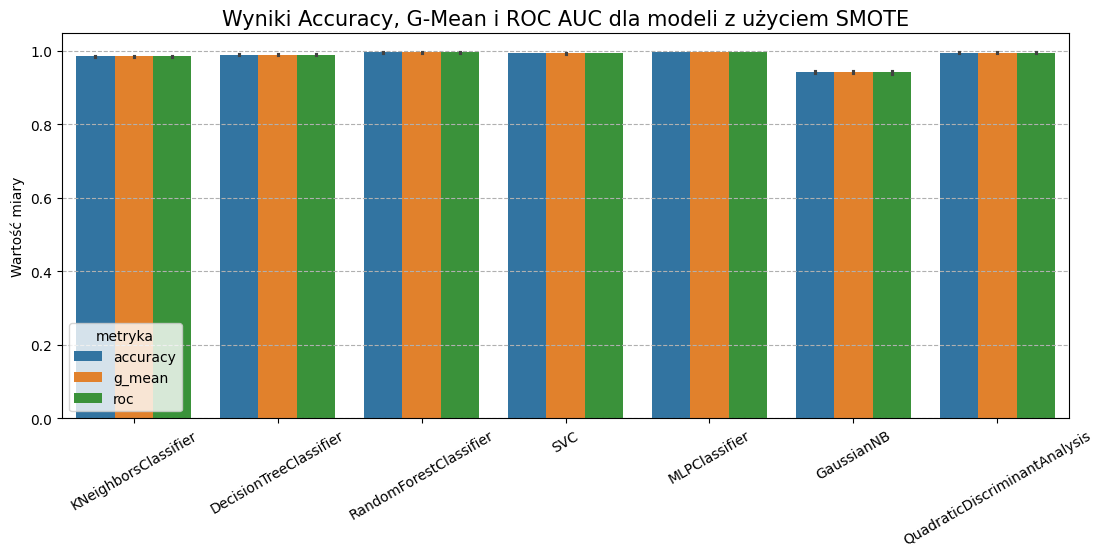

In [20]:
plt.figure(figsize=(13, 5))
ax = sns.barplot(data=df_melted, x='model', y='metric_value', hue='metryka')
plt.xticks(rotation=30)
plt.title("Wyniki Accuracy, G-Mean i ROC AUC dla modeli z użyciem SMOTE", fontsize=15)
plt.xlabel("")
plt.ylabel("Wartość miary")
plt.grid(linestyle='--', axis='y')
plt.savefig("metrics_smote.png")
plt.show();

# Zadanie 5

In [27]:
start = time.time()
models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(class_weight='balanced'),
    RandomForestClassifier(class_weight='balanced'),
    SVC(class_weight='balanced'),
    MLPClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]
fold_10 = StratifiedKFold(n_splits=10, shuffle=True)
metrics = []


for model in models:
    for i, (train_index, test_index) in enumerate(fold_10.split(X, y)):
        X_train, y_train, X_test, y_test = X.loc[train_index], y.loc[train_index], X.loc[test_index], y.loc[test_index]
        pipe = make_pipeline(StandardScaler(), model)
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)
        roc = roc_auc_score(y_test, y_pred)
        metrics.append({'model': str(type(model)), 'accuracy': accuracy, 'g_mean': g_mean, 'roc': roc})

end = time.time()

print(f"Time: {end - start} seconds") 
df_result = pd.DataFrame(metrics)
df_result

Time: 142.95156741142273 seconds


model  accuracy    g_mean  \
0   <class 'sklearn.neighbors._classification.KNei...     0.992  0.875144   
1   <class 'sklearn.neighbors._classification.KNei...     0.985  0.890268   
2   <class 'sklearn.neighbors._classification.KNei...     0.993  0.875595   
3   <class 'sklearn.neighbors._classification.KNei...     0.996  0.948194   
4   <class 'sklearn.neighbors._classification.KNei...     0.994  0.912400   
..                                                ...       ...       ...   
65  <class 'sklearn.discriminant_analysis.Quadrati...     0.991  0.945745   
66  <class 'sklearn.discriminant_analysis.Quadrati...     0.982  0.832770   
67  <class 'sklearn.discriminant_analysis.Quadrati...     0.991  0.962600   
68  <class 'sklearn.discriminant_analysis.Quadrati...     0.988  0.891657   
69  <class 'sklearn.discriminant_analysis.Quadrati...     0.990  0.930363   

         roc  
0   0.882818  
1   0.895361  
2   0.883333  
3   0.949485  
4   0.916151  
..       ...  
65  0.946907  
66  0.845361  
67  0.963058  
68  0.896907  
69  0.932388  

[70 rows x 4 columns]

In [28]:
df_group = df_result.groupby('model').mean()
df_group

accuracy    g_mean  \
model                                                                    
<class 'sklearn.discriminant_analysis.Quadratic...    0.9892  0.920198   
<class 'sklearn.ensemble._forest.RandomForestCl...    0.9899  0.877318   
<class 'sklearn.naive_bayes.GaussianNB'>              0.9344  0.927045   
<class 'sklearn.neighbors._classification.KNeig...    0.9916  0.884166   
<class 'sklearn.neural_network._multilayer_perc...    0.9921  0.907284   
<class 'sklearn.svm._classes.SVC'>                    0.9909  0.933572   
<class 'sklearn.tree._classes.DecisionTreeClass...    0.9853  0.860226   

                                                         roc  
model                                                         
<class 'sklearn.discriminant_analysis.Quadratic...  0.923582  
<class 'sklearn.ensemble._forest.RandomForestCl...  0.885557  
<class 'sklearn.naive_bayes.GaussianNB'>            0.927473  
<class 'sklearn.neighbors._classification.KNeig...  0.891117  
<class 'sklearn.neural_network._multilayer_perc...  0.912210  
<class 'sklearn.svm._classes.SVC'>                  0.935872  
<class 'sklearn.tree._classes.DecisionTreeClass...  0.869942

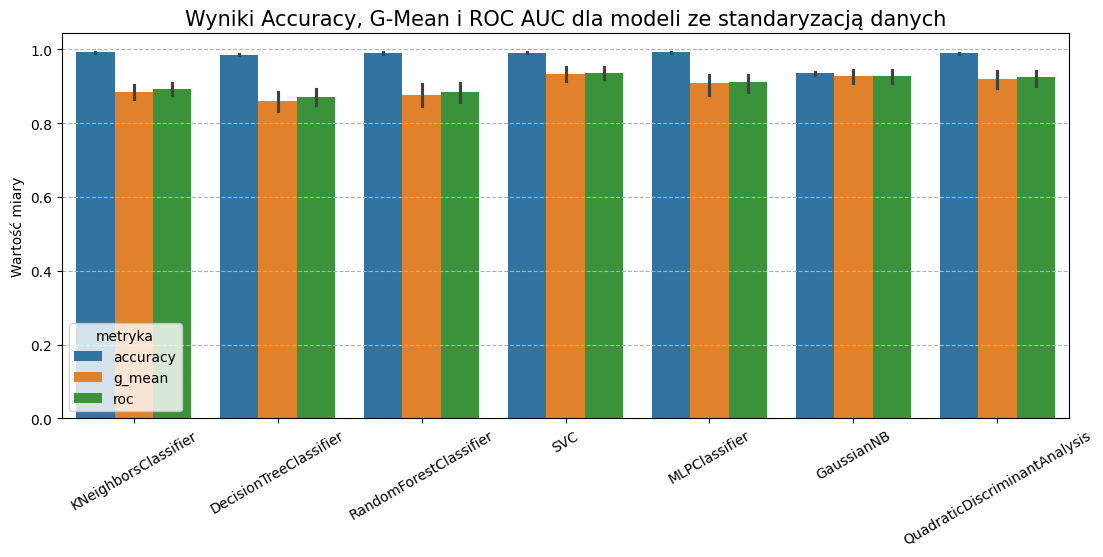

In [29]:
df_melted = pd.melt(df_result, id_vars=['model'], var_name='metryka', value_name='metric_value')
df_melted['model'] = df_melted['model'].str.split('.').str[-1].str.split("'").str[0]
plt.figure(figsize=(13, 5))
ax = sns.barplot(data=df_melted, x='model', y='metric_value', hue='metryka')
plt.xticks(rotation=30)
plt.title("Wyniki Accuracy, G-Mean i ROC AUC dla modeli ze standaryzacją danych", fontsize=15)
plt.xlabel("")
plt.ylabel("Wartość miary")
plt.grid(linestyle='--', axis='y')
plt.savefig("metrics_standard.png")
plt.show();

# Zadanie 6

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer

forest = RandomForestClassifier()
parameters = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [10, 50, None],
    'class_weight': ['balanced', None]
}
clf = GridSearchCV(forest, parameters, scoring=make_scorer(geometric_mean_score), cv=10) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
metrics = []

clf.fit(X_train, y_train)

print("Najlepsze parametry znalezione przez GridSearchCV:")
print(clf.best_params_)

y_pred = clf.predict(X_test)

Najlepsze parametry znalezione przez GridSearchCV:
{'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 50}
Raport klasyfikacji:


NameError: name 'classification_report' is not defined

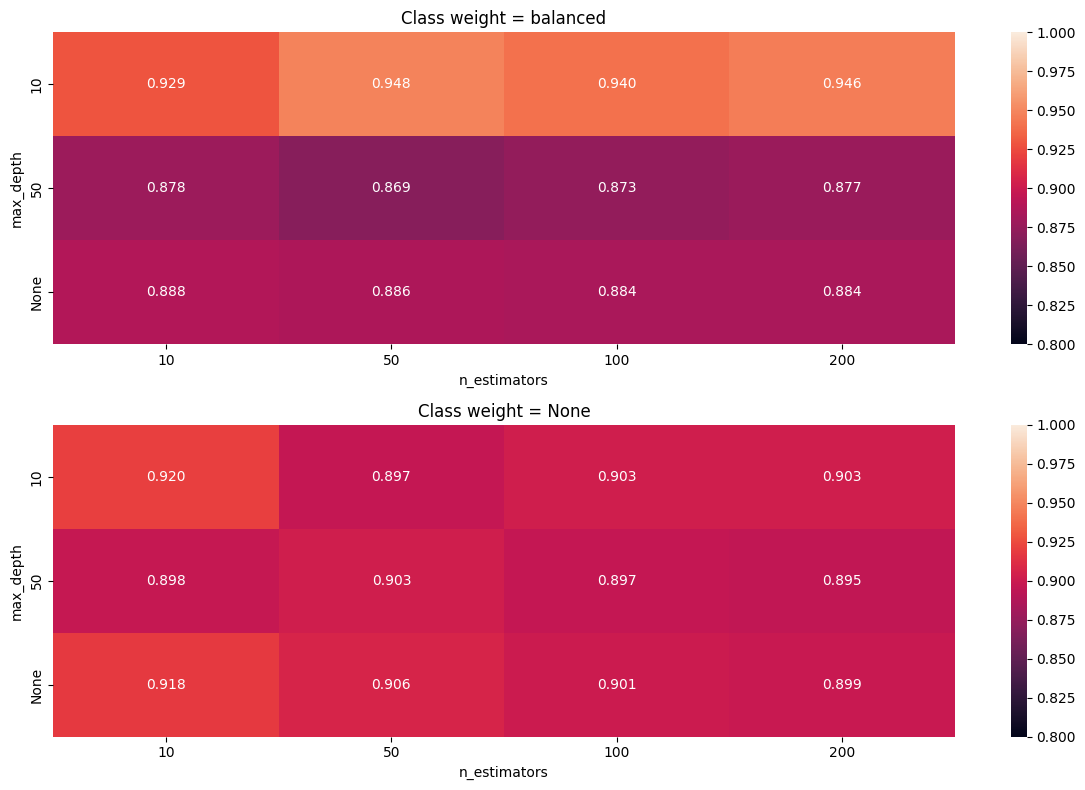

In [31]:
import seaborn as sns

results = clf.cv_results_
scores_mean = np.array(results['mean_test_score']).reshape(len(parameters['class_weight']), len(parameters['max_depth']), len(parameters['n_estimators']))

plt.figure(figsize=(12, 8))

# Heatmapa dla różnych wartości n_estimators
for idx, val in enumerate(parameters['class_weight']):
    plt.subplot(2, 1, idx+1)
    sns.heatmap(scores_mean[idx, :, :], 
                annot=True, 
                fmt=".3f", 
                xticklabels=[x if x is not None else 'None' for x in parameters['n_estimators']],
                yticklabels=[x if x is not None else 'None' for x in parameters['max_depth']],
                vmin=0.8,
                vmax=1
               )
    plt.title(f'Class weight = {val}')
    plt.xlabel('n_estimators')
    plt.ylabel('max_depth')

plt.tight_layout()
plt.savefig("heatmap_forest.png")
plt.show()

# Zadanie 7

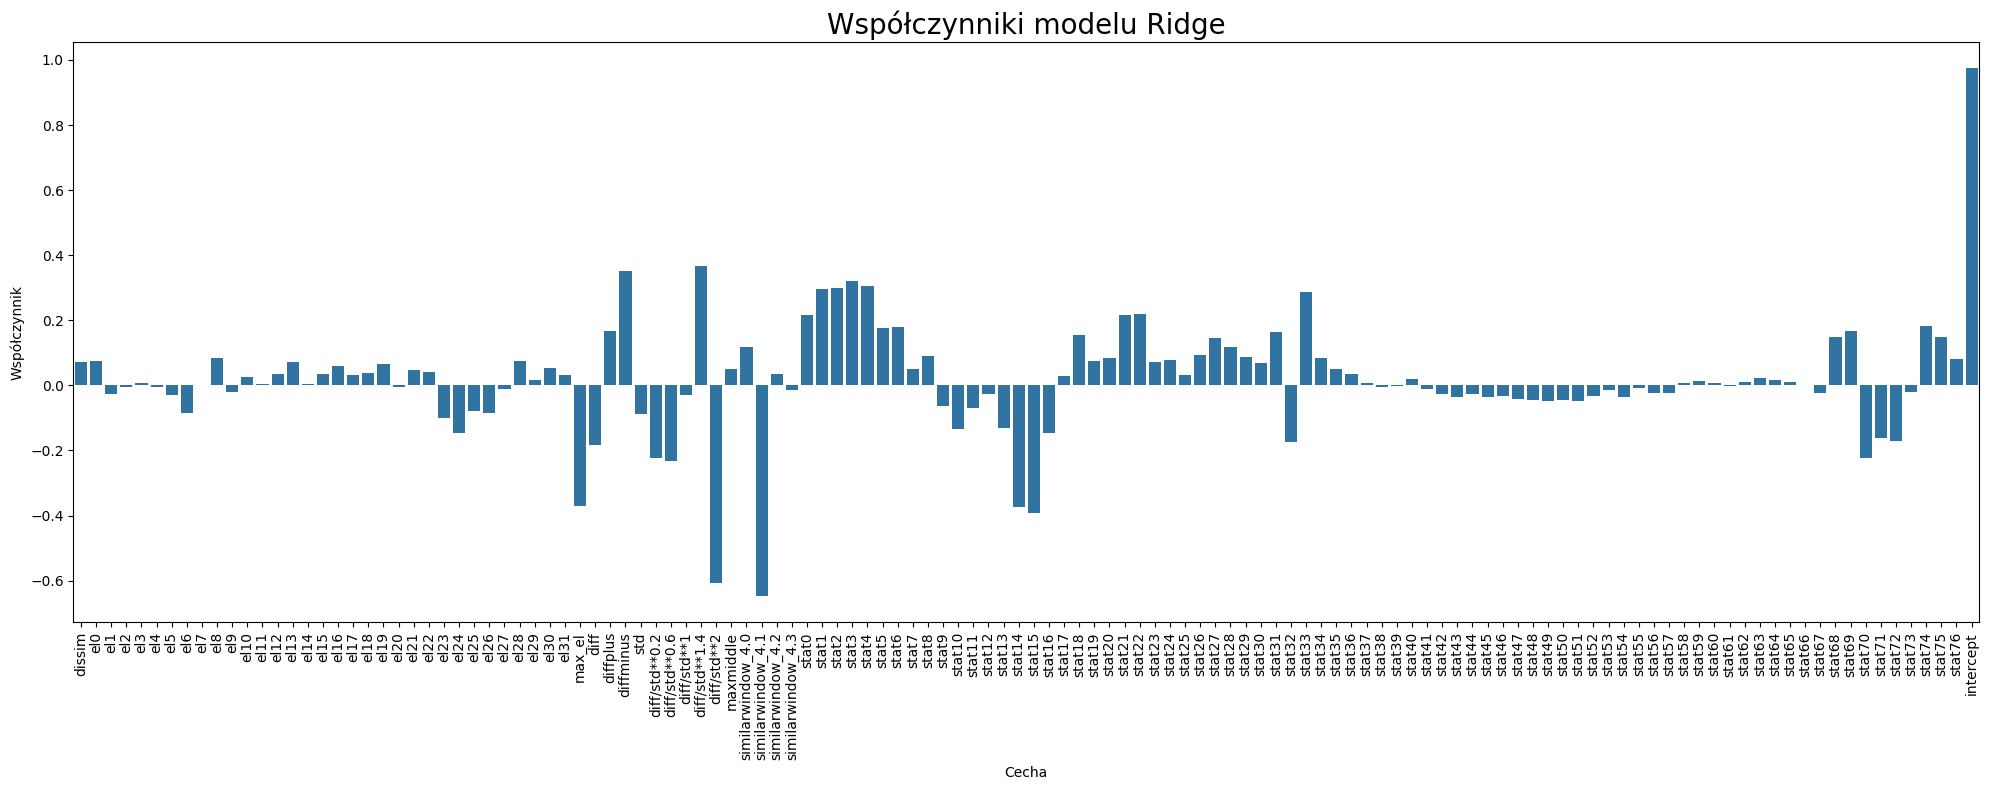

In [40]:
# Inicjalizacja modelu
ridge = Ridge()
ridge.fit(X, y)

coefficients = list(ridge.coef_) + [ridge.intercept_]
columns = list(df.columns[:-1]) + ['intercept']
data = {'Features': columns, 'Coefficients': coefficients}

# Tworzenie wykresu za pomocą Seaborn
plt.figure(figsize=(20, 8))
sns.barplot(x='Features', y='Coefficients', data=data)
plt.xticks(rotation=90)
plt.title('Współczynniki modelu Ridge', fontsize=20)
plt.xlabel('Cecha')
plt.ylabel('Współczynnik')
plt.tight_layout()
plt.savefig("coefficients.png")
plt.show()

# Zadanie 8

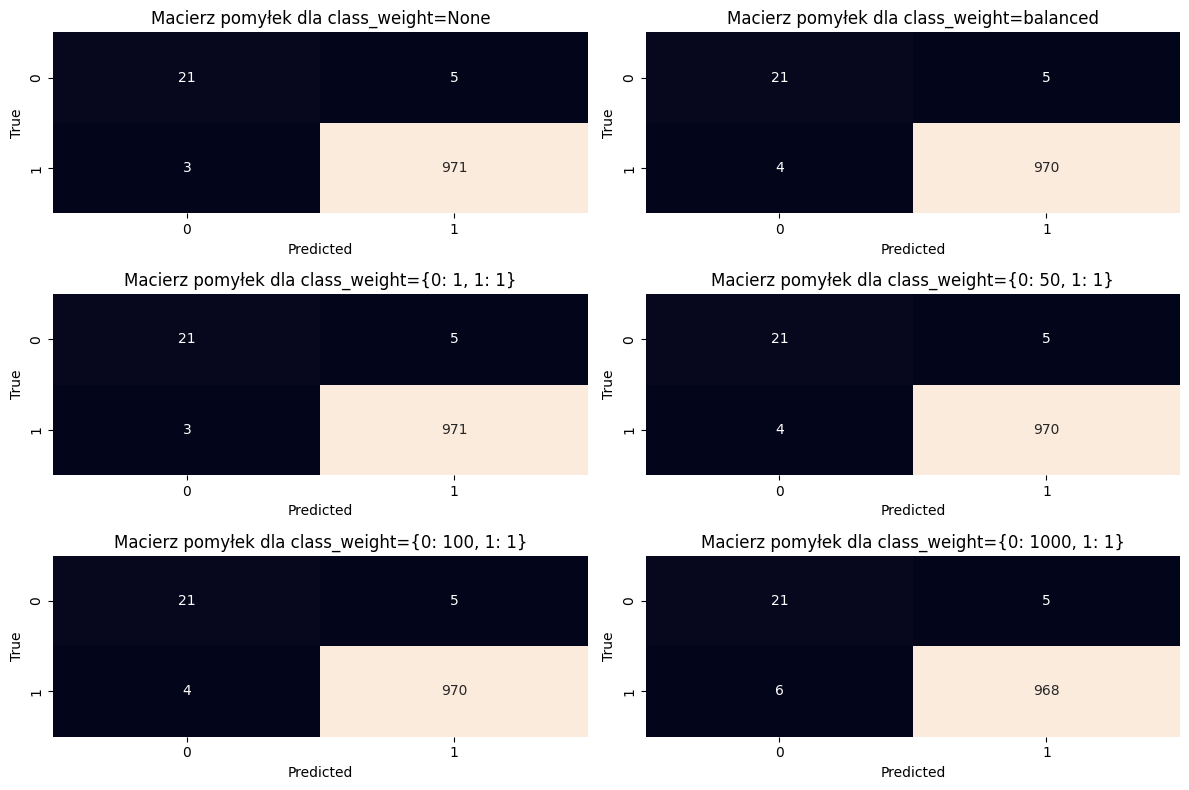

In [58]:
np.random.seed(42)
class_weights = [None, 'balanced', {0: 1, 1: 1}, {0: 50, 1: 1}, {0: 100, 1: 1}, {0: 1000, 1: 1}]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


plt.figure(figsize=(12, 8))
for idx, weight in enumerate(class_weights):
    plt.subplot(3, 2, idx+1)
    forest = RandomForestClassifier(class_weight=weight)
    
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.title(f'Macierz pomyłek dla class_weight={weight}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.savefig("confusion_matrices.png")
plt.show()

# Zadanie 9

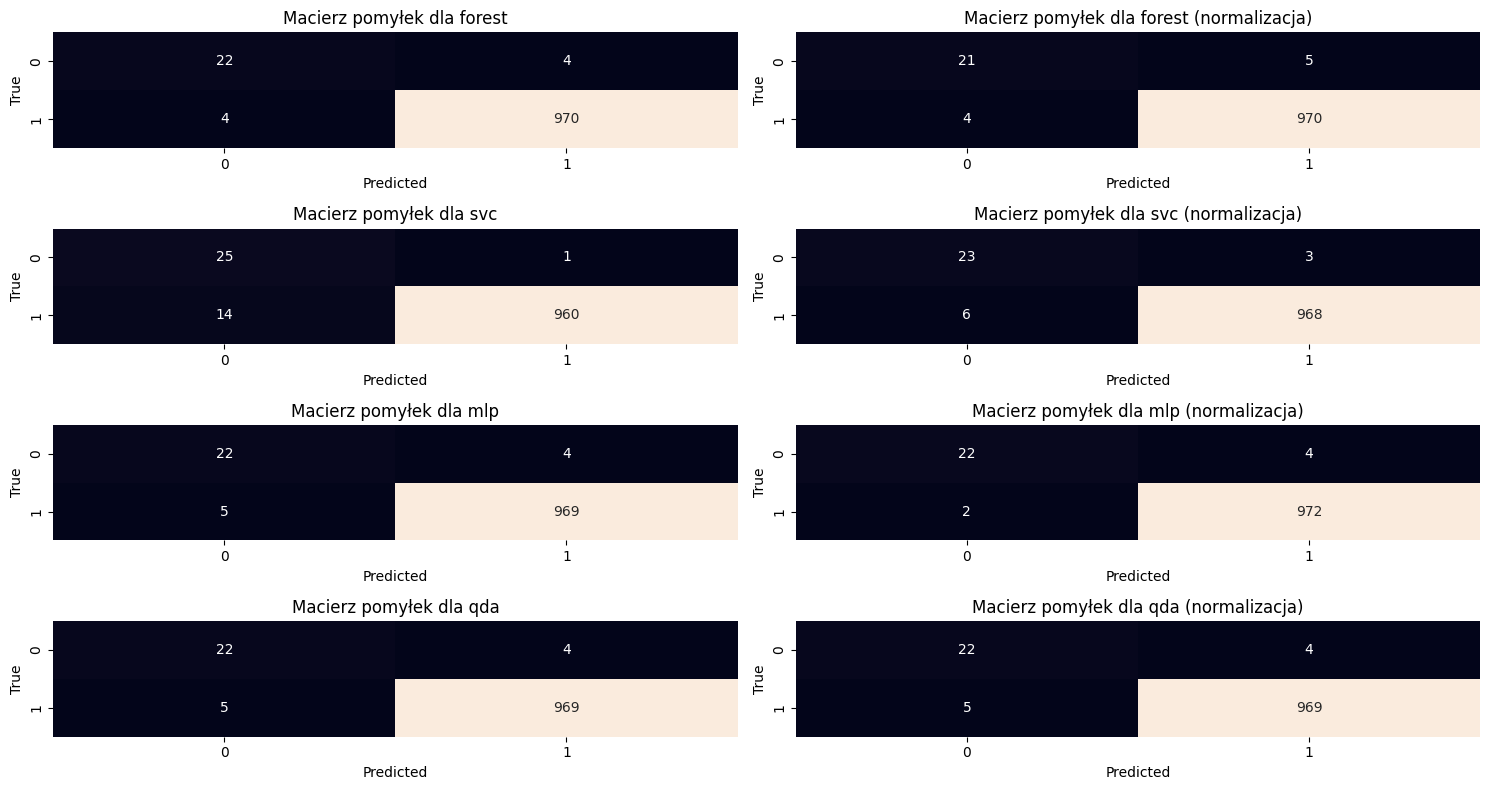

In [70]:
models = [
    ('forest', RandomForestClassifier(class_weight='balanced')),
    ('svc', SVC(class_weight='balanced')),
    ('mlp', MLPClassifier()),
    ('qda', QuadraticDiscriminantAnalysis())
]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

plt.figure(figsize=(15, 8))

for idx, (name, model) in enumerate(models):
    plt.subplot(4, 2, idx*2+1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.title(f'Macierz pomyłek dla {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.subplot(4, 2, idx*2+2)
    model.fit(X_train_st, y_train)
    y_pred = model.predict(X_test_st)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.title(f'Macierz pomyłek dla {name} (normalizacja)')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.savefig("confusion_matrices_models.png")
plt.show()

In [71]:
models = [
    RandomForestClassifier(class_weight='balanced'),
    SVC(class_weight='balanced'),
    MLPClassifier(),
    QuadraticDiscriminantAnalysis()
]
fold_10 = StratifiedKFold(n_splits=10, shuffle=True)
metrics = []

for model in models:
    for i, (train_index, test_index) in enumerate(fold_10.split(X, y)):
        X_train, y_train, X_test, y_test = X.loc[train_index], y.loc[train_index], X.loc[test_index], y.loc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)
        roc = roc_auc_score(y_test, y_pred)
        metrics.append({'model': str(type(model)), 'accuracy': accuracy, 'g_mean': g_mean, 'roc': roc})

df_result_bare_9 = pd.DataFrame(metrics)
# Assuming df_result_bare_9 is your DataFrame
df_group = df_result_bare_9.groupby('model').agg({'accuracy': ['mean', 'std'],
                                                  'g_mean': ['mean', 'std'],
                                                  'roc': ['mean', 'std']
                                                 })

# Rename the columns for clarity
df_group.columns = ['{}_{}'.format(col[0], col[1]) for col in df_group.columns]
df_group

accuracy_mean  \
model                                                               
<class 'sklearn.discriminant_analysis.Quadratic...         0.9887   
<class 'sklearn.ensemble._forest.RandomForestCl...         0.9894   
<class 'sklearn.neural_network._multilayer_perc...         0.9915   
<class 'sklearn.svm._classes.SVC'>                         0.9839   

                                                    accuracy_std  g_mean_mean  \
model                                                                           
<class 'sklearn.discriminant_analysis.Quadratic...      0.004244     0.925405   
<class 'sklearn.ensemble._forest.RandomForestCl...      0.003026     0.873887   
<class 'sklearn.neural_network._multilayer_perc...      0.003923     0.917633   
<class 'sklearn.svm._classes.SVC'>                      0.005216     0.968834   

                                                    g_mean_std  roc_mean  \
model                                                                      
<class 'sklearn.discriminant_analysis.Quadratic...    0.035999  0.928277   
<class 'sklearn.ensemble._forest.RandomForestCl...    0.037443  0.882015   
<class 'sklearn.neural_network._multilayer_perc...    0.048613  0.921753   
<class 'sklearn.svm._classes.SVC'>                    0.023695  0.969196   

                                                     roc_std  
model                                                         
<class 'sklearn.discriminant_analysis.Quadratic...  0.033288  
<class 'sklearn.ensemble._forest.RandomForestCl...  0.033808  
<class 'sklearn.neural_network._multilayer_perc...  0.043669  
<class 'sklearn.svm._classes.SVC'>                  0.023166